# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
print(data.head(2))

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473


In [3]:
male_df = data.loc[data.Gender == 'Male']
female_df = data.loc[data.Gender == 'Female']

print('Male Height - Mean: ', male_df.Height.mean())
print('Male Height - Std: ', male_df.Height.std())
print('Male Weight - Mean: ', male_df.Weight.mean())
print('Male Weight - Std: ', male_df.Weight.std())
print('Female Height - Mean: ', female_df.Height.mean())
print('Female Height - Std: ', female_df.Height.std())
print('Female Weight - Mean: ', female_df.Weight.mean())
print('Female Weight - Std: ', female_df.Weight.std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height - Mean:  69.02634590621737
Male Height - Std:  2.8633622286606517
Male Weight - Mean:  187.0206206581929
Male Weight - Std:  19.781154516763813
Female Height - Mean:  63.708773603424916
Female Height - Std:  2.696284015765056
Female Weight - Mean:  135.8600930074687
Female Weight - Std:  19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

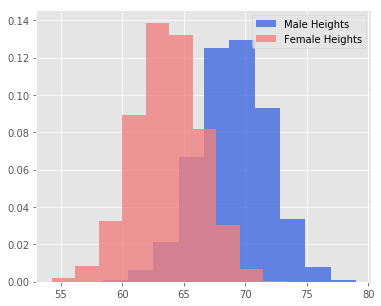

In [4]:
plt.figure(figsize=(6,5))
plt.hist(male_df.Height, color='royalblue', bins=10, alpha=0.8, density=True, label='Male Heights')
plt.hist(female_df.Height, color='lightcoral',bins=10, alpha=0.8, density=True, label='Female Heights')
plt.legend()
plt.show();

In [5]:
# Record your observations - are these in line with your personal observations?
# --> Men tend to be higher than women. Yes, this is what I observe, too...
# --> Both follow a normal distribution.

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

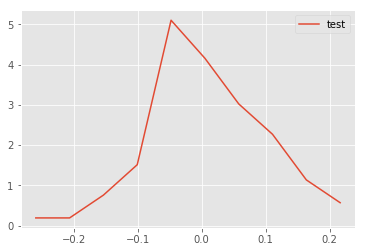

In [6]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
    # Initialize numpy arrays according to number of bins with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5 * (bins[k] + bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

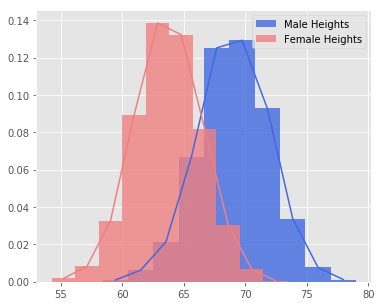

In [7]:
# Prepare the figure
plt.figure(figsize=(6,5))

# Plot the histograms first ...
plt.hist(male_df.Height, color='royalblue', bins=10, alpha=0.8, density=True, label='Male Heights')
plt.hist(female_df.Height, color='lightcoral',bins=10, alpha=0.8, density=True, label='Female Heights')
plt.legend()

# ... and the density plots second
x,y = density(male_df.Height)
plt.plot(x,y, color='royalblue')
x,y = density(female_df.Height)
plt.plot(x,y, color='lightcoral')

plt.show();

#### Repeat above exercise for male and female weights

In [8]:
# Your code here 

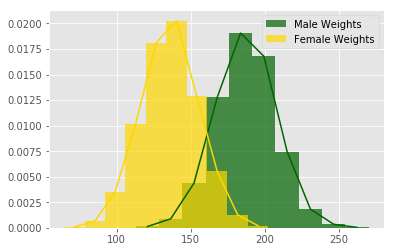

In [9]:
# Prepare the figure
plt.figure(figsize=(6,4))

# Plot the histograms first ...
plt.hist(male_df.Weight, color='darkgreen', bins=10, alpha=0.7, density=True, label='Male Weights')
plt.hist(female_df.Weight, color='gold',bins=10, alpha=0.7, density=True, label='Female Weights')
plt.legend()

# ... and the density plots second
x,y = density(male_df.Weight)
plt.plot(x,y, color='darkgreen')
x,y = density(female_df.Weight)
plt.plot(x,y, color='gold')

plt.show();

#### Write your observations in the cell below.

In [10]:
# Record your observations - are these inline with your personal observations?
# --> Similar to Height.
# So whats the takeaway when comparing male and female heights and weights 
# --> but the distributions in Height are a bit more distinct than those in Weight.

#### Repeat Above experiments in seaborn and compare with your results. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


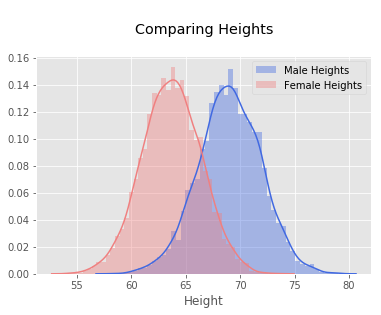

In [11]:
import seaborn as sns
sns.distplot(male_df.Height, color='royalblue', label='Male Heights')
sns.distplot(female_df.Height, color='lightcoral', label='Female Heights')
plt.legend()
plt.title('\nComparing Heights\n');

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


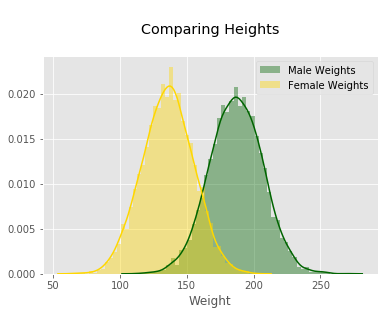

In [12]:
import seaborn as sns
sns.distplot(male_df.Weight, color='darkgreen', label='Male Weights')
sns.distplot(female_df.Weight, color='gold', label='Female Weights')
plt.legend()
plt.title('\nComparing Heights\n');

In [13]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# --> Seaborn smoothens the density functions.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.